In [3]:
#Packages 
import numpy as np
import xarray as xr

import glob
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

states_provinces = cfeature.NaturalEarthFeature(
                   category='cultural',
                   name='admin_1_states_provinces_lines',
                   scale='110m',
                   facecolor='none')
crs = ccrs.PlateCarree(central_longitude=0)

In [4]:
ds = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r3/ocean/global_ocean/GoM5/WOA23/dynamic_adjustment/simulation/mpaso.hist.am.highFrequencyOutput.0001-10-01_00.00.00.nc')
# ds = ds.isel(Time = slice(8, len(ds.Time)+1))
dsi = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r3/ocean/global_ocean/GoM5/WOA23/init/initial_state/initial_state.nc')
# ds.xtime

In [5]:
ds.xtime.values

array([b'0001-10-18_00:00:00', b'0001-10-19_00:00:00',
       b'0001-10-20_00:00:00', b'0001-10-21_00:00:00',
       b'0001-10-22_00:00:00', b'0001-10-23_00:00:00',
       b'0001-10-24_00:00:00', b'0001-10-25_00:00:00',
       b'0001-10-26_00:00:00', b'0001-10-27_00:00:00',
       b'0001-10-28_00:00:00', b'0001-10-29_00:00:00',
       b'0001-10-30_00:00:00', b'0001-10-31_00:00:00'], dtype='|S64')

In [42]:
lat_c = np.degrees(dsi.variables['latCell'][:])
lon_c = np.degrees(dsi.variables['lonCell'][:])

rv = ds.relativeVorticityCell[:,:,0]/dsi.fCell
div = ds.divergence[:,:,0]/dsi.fCell
w = ds.vertVelocityTop[:,:,0]

### Plot them individually, then combine 

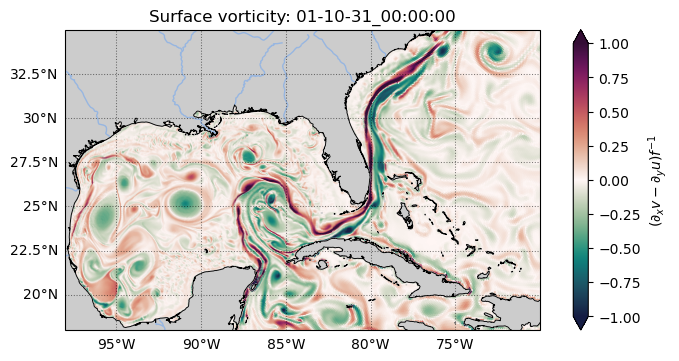

In [43]:
t = -1
fig, ax = plt.subplots(1, figsize = (8,3.5), subplot_kw={'projection': crs}, constrained_layout = True)

lat_rad = 1.0/np.cos(np.radians(lat_c.mean().values))

m = ax.scatter(lon_c,lat_c,c=rv[t],
               cmap=plt.get_cmap('cmo.curl'),
               vmin=-1,vmax=1, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, -70, 18, 35], ccrs.PlateCarree())

ax.add_feature(land_10m, facecolor='0.8')
ax.set_aspect(lat_rad)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
ax.set_title('Surface vorticity: '+str(ds.xtime[t].values)[4:-1])
fig.canvas.draw()

# plt.savefig('mpas_relvort_2pt5_km.png', dpi = 300, bbox_inches='tight')

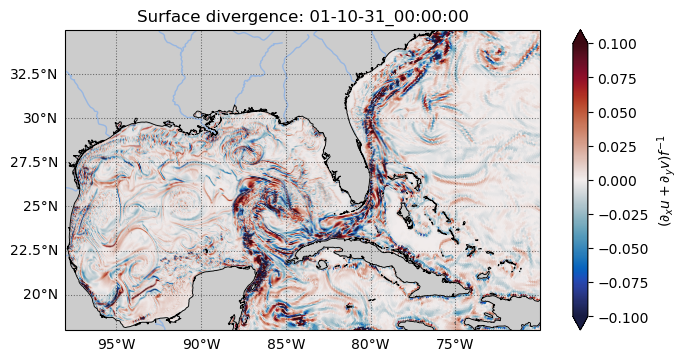

In [44]:
fig, ax = plt.subplots(1, figsize = (8,3.5), subplot_kw={'projection': crs}, constrained_layout = True)

lat_rad = 1.0/np.cos(np.radians(lat_c.mean().values))

m = ax.scatter(lon_c,lat_c,c=div[t],
               cmap=plt.get_cmap('cmo.balance'),
               vmin=-0.1,vmax=0.1, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, -70, 18, 35], ccrs.PlateCarree())

ax.add_feature(land_10m, facecolor='0.8')
ax.set_aspect(lat_rad)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'$(\partial_x u + \partial_y v) f^{-1}$', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
ax.set_title('Surface divergence: '+str(ds.xtime[t].values)[4:-1])
fig.canvas.draw()

# plt.savefig('mpas_relvort_2pt5_km.png', dpi = 300, bbox_inches='tight')

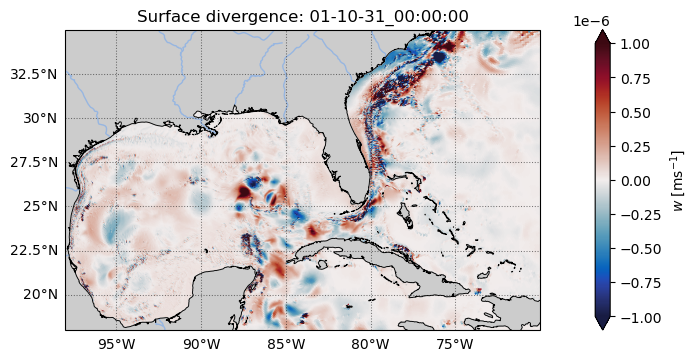

In [45]:
fig, ax = plt.subplots(1, figsize = (8,3.5), subplot_kw={'projection': crs}, constrained_layout = True)

m = ax.scatter(lon_c,lat_c,c=w[-1],
               cmap=plt.get_cmap('cmo.balance'),
               vmin=-0.000001,vmax=0.000001, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, -70, 18, 35], ccrs.PlateCarree())

ax.add_feature(land_10m, facecolor='0.8')
ax.set_aspect(lat_rad)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'$w$ [ms$^{-1}$]', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
ax.set_title('Surface divergence: '+str(ds.xtime[t].values)[4:-1])
fig.canvas.draw()

# plt.savefig('mpas_relvort_2pt5_km.png', dpi = 300, bbox_inches='tight')

### Check $w$ in the second closest surface layer 

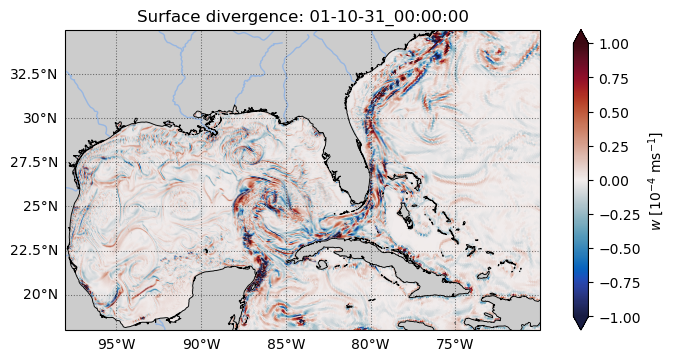

In [46]:
fig, ax = plt.subplots(1, figsize = (8,3.5), subplot_kw={'projection': crs}, constrained_layout = True)

m = ax.scatter(lon_c,lat_c,c=ds.vertVelocityTop[-1,:,1]*1e4,
               cmap=plt.get_cmap('cmo.balance'),
               vmin=-1,vmax=1, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, -70, 18, 35], ccrs.PlateCarree())

ax.add_feature(land_10m, facecolor='0.8')
ax.set_aspect(lat_rad)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'$w$ [10$^{-4}$ ms$^{-1}$]', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
ax.set_title('Surface divergence: '+str(ds.xtime[t].values)[4:-1])
fig.canvas.draw()

# plt.savefig('mpas_relvort_2pt5_km.png', dpi = 300, bbox_inches='tight')

#### Bingo - don't want the first layer 

### Combine into one subplot 

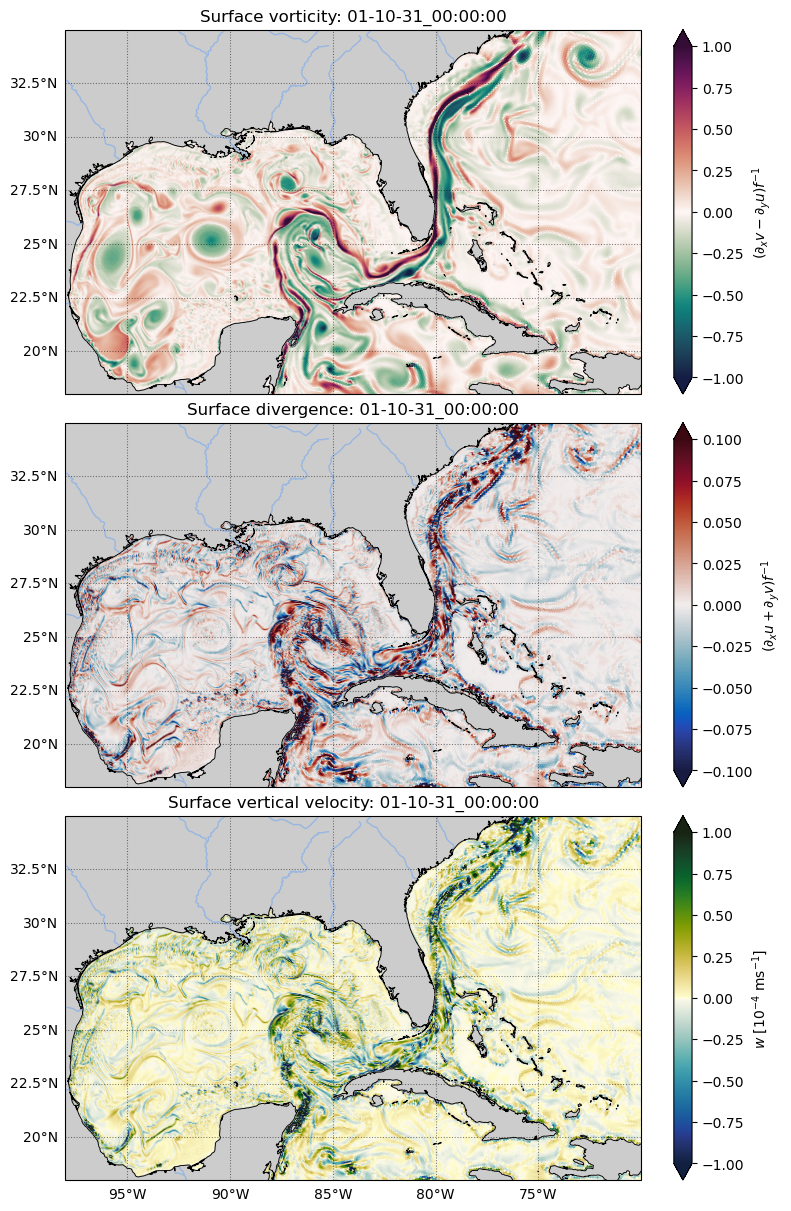

In [47]:
t = -1
ncols = 1;nrows = 3;
fig, ax = plt.subplots(nrows,ncols,figsize = (8,12), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True)

m = ax[0].scatter(lon_c,lat_c,c=rv[t],
                  cmap=plt.get_cmap('cmo.curl'),
                  vmin=-1,vmax=1, s= 1,
                  transform = ccrs.PlateCarree())

m1 = ax[1].scatter(lon_c,lat_c,c=div[t],
                  cmap=plt.get_cmap('cmo.balance'),
                  vmin=-0.1,vmax=0.1, s= 1,
                  transform = ccrs.PlateCarree())

m2 = ax[2].scatter(lon_c,lat_c,c=ds.vertVelocityTop[t,:,1]*1e4,
                  cmap=plt.get_cmap('cmo.delta'),
                  vmin=-1,vmax=1, s= 1,
                  transform = ccrs.PlateCarree())

for i in range(3):
    ax[i].set_extent([-98, -70, 18, 35], ccrs.PlateCarree())
    ax[i].add_feature(land_10m, facecolor='0.8')
    ax[i].set_aspect(lat_rad)
    ax[i].add_feature(cartopy.feature.RIVERS, linewidth=1)
    ax[i].coastlines(resolution='10m', linewidth = 0.65)  

fig.colorbar(m, ax = ax[0], label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')
fig.colorbar(m1, ax = ax[1], label = r'$(\partial_x u + \partial_y v) f^{-1}$', extend = 'both')
fig.colorbar(m2, ax = ax[2], label = r'$w$ [10$^{-4}$ ms$^{-1}$]', extend = 'both')

gl = ax[0].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = False

gl = ax[1].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = False

gl = ax[2].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

ax[0].set_title('Surface vorticity: '+str(ds.xtime[t].values)[4:-1])
ax[1].set_title('Surface divergence: '+str(ds.xtime[t].values)[4:-1])
ax[2].set_title('Surface vertical velocity: '+str(ds.xtime[t].values)[4:-1])

fig.canvas.draw()

plt.savefig('mpas_3km_rvortdivw.png', dpi = 300, bbox_inches='tight')

### Same thing but at 250 m 

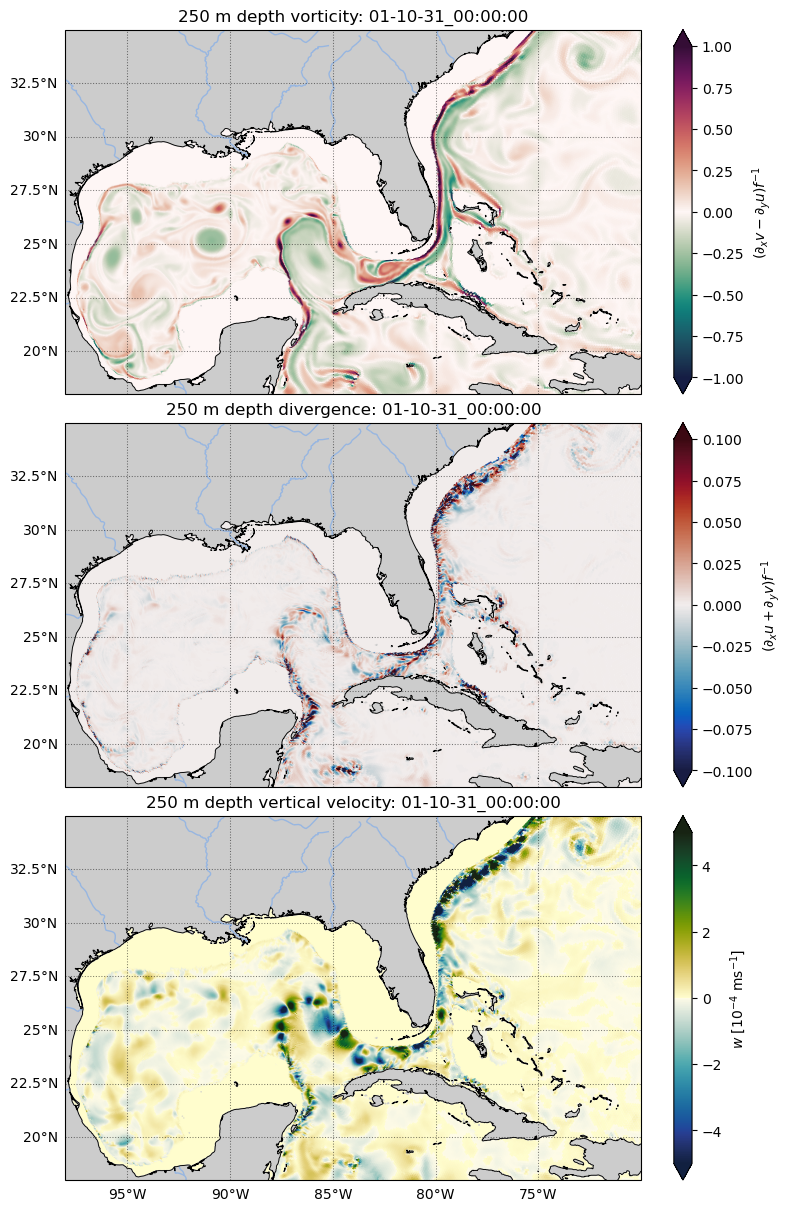

In [54]:
t = -1
ncols = 1;nrows = 3;
fig, ax = plt.subplots(nrows,ncols,figsize = (8,12), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True)

m = ax[0].scatter(lon_c,lat_c,c=ds.relativeVorticityAt250m[t]/dsi.fCell,
                  cmap=plt.get_cmap('cmo.curl'),
                  vmin=-1,vmax=1, s= 1,
                  transform = ccrs.PlateCarree())

m1 = ax[1].scatter(lon_c,lat_c,c=ds.divergenceAt250m[t]/dsi.fCell,
                  cmap=plt.get_cmap('cmo.balance'),
                  vmin=-0.1,vmax=0.1, s= 1,
                  transform = ccrs.PlateCarree())

m2 = ax[2].scatter(lon_c,lat_c,c=ds.vertVelAt250m[t]*1e4,
                  cmap=plt.get_cmap('cmo.delta'),
                  vmin=-5,vmax=5, s= 1,
                  transform = ccrs.PlateCarree())

for i in range(3):
    ax[i].set_extent([-98, -70, 18, 35], ccrs.PlateCarree())
    ax[i].add_feature(land_10m, facecolor='0.8')
    ax[i].set_aspect(lat_rad)
    ax[i].add_feature(cartopy.feature.RIVERS, linewidth=1)
    ax[i].coastlines(resolution='10m', linewidth = 0.65)  

fig.colorbar(m, ax = ax[0], label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')
fig.colorbar(m1, ax = ax[1], label = r'$(\partial_x u + \partial_y v) f^{-1}$', extend = 'both')
fig.colorbar(m2, ax = ax[2], label = r'$w$ [10$^{-4}$ ms$^{-1}$]', extend = 'both')

gl = ax[0].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = False

gl = ax[1].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = False

gl = ax[2].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

ax[0].set_title('250 m depth vorticity: '+str(ds.xtime[t].values)[4:-1])
ax[1].set_title('250 m depth divergence: '+str(ds.xtime[t].values)[4:-1])
ax[2].set_title('250 m depth vertical velocity: '+str(ds.xtime[t].values)[4:-1])

fig.canvas.draw()

plt.savefig('mpas_3km_rvortdivw_250m.png', dpi = 300, bbox_inches='tight')

### Movie of vorticity 

In [36]:
ds.xtime[0].values

array(b'0001-09-26_00:00:00', dtype='|S64')

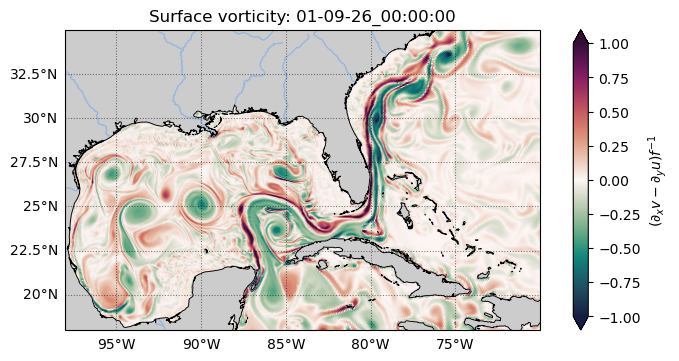

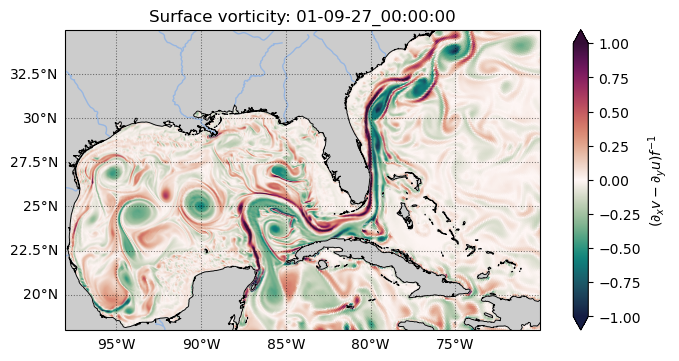

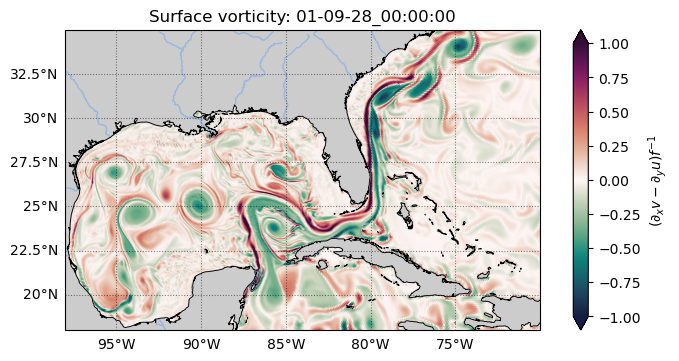

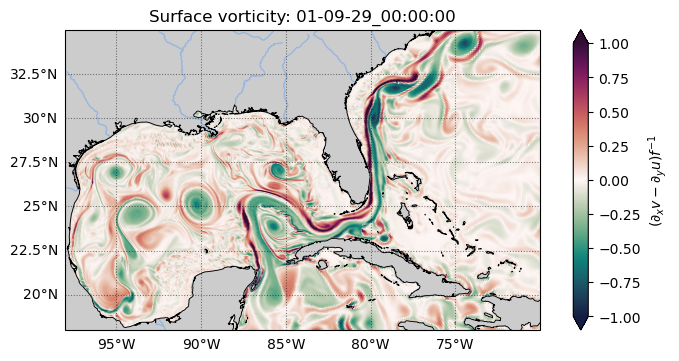

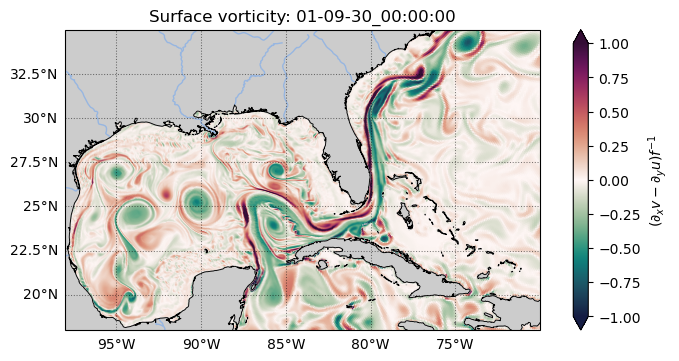

In [38]:
for t in range(len(ds.xtime)):
    fig, ax = plt.subplots(1, figsize = (8,3.5), 
                           subplot_kw={'projection': crs}, 
                           constrained_layout = True)
    
    lat_rad = 1.0/np.cos(np.radians(lat_c.mean().values))
    
    m = ax.scatter(lon_c,lat_c,c=rv[t],
                   cmap=plt.get_cmap('cmo.curl'),
                   vmin=-1,vmax=1, s= 1,
                   transform = ccrs.PlateCarree())
    
    ax.set_extent([-98, -70, 18, 35], ccrs.PlateCarree())
    
    ax.add_feature(land_10m, facecolor='0.8')
    ax.set_aspect(lat_rad)
    ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
    ax.coastlines(resolution='10m', linewidth = 0.65)  
    fig.colorbar(m, ax = ax, label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')
    
    gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.right_labels = False
    gl.left_labels = True
    gl.top_labels = False
    gl.bottom_labels = True
    ax.set_title('Surface vorticity: '+str(ds.xtime[t].values)[4:-1])
    fig.canvas.draw()
    plt.savefig('ani/gom3_rvort_'+str(t+48)+'.png', dpi = 300, bbox_inches='tight')
# plt.savefig('mpas_relvort_2pt5_km.png', dpi = 300, bbox_inches='tight')

### Now compare 128 layer and 64 layer case 

In [6]:
ds_64 = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r3/ocean/global_ocean/GoM5/WOA23/dynamic_adjustment/simulation/mpaso.hist.am.highFrequencyOutput.0001-03-01_00.00.00.nc')
dsi_64 = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r3/ocean/global_ocean/GoM5/WOA23/init/initial_state/initial_state.nc')

ds_128 = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r4/ocean/global_ocean/GoM5/WOA23/dynamic_adjustment/simulation/mpaso.hist.am.highFrequencyOutput.0001-03-01_00.00.00.nc')
dsi_128 = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom3_r4/ocean/global_ocean/GoM5/WOA23/init/initial_state/initial_state.nc')

In [8]:
# Print the final time to ensure dates match
print(ds_64.xtime[-1].values, ds_128.xtime[-1].values)

b'0001-03-31_00:00:00' b'0001-03-31_00:00:00'


In [36]:
latc_64 = np.degrees(dsi_64.variables['latCell'][:])
lonc_64 = np.degrees(dsi_64.variables['lonCell'][:])
rv_64 = ds_64.relativeVorticityCell[:,:,0]/dsi_64.fCell
div_64 = ds_64.divergence[:,:,0]/dsi_64.fCell
w_64 = ds_64.vertVelocityTop[:,:,1]

latc_128 = np.degrees(dsi_128.variables['latCell'][:])
lonc_128 = np.degrees(dsi_128.variables['lonCell'][:])
rv_128 = ds_128.relativeVorticityCell[:,:,0]/dsi_128.fCell
div_128 = ds_128.divergence[:,:,0]/dsi_128.fCell
w_128 = ds_128.vertVelocityTop[:,:,1]

In [51]:
ds_128.divergence[-1,:,-1].values

array([0., 0., 0., ..., 0., 0., 0.])

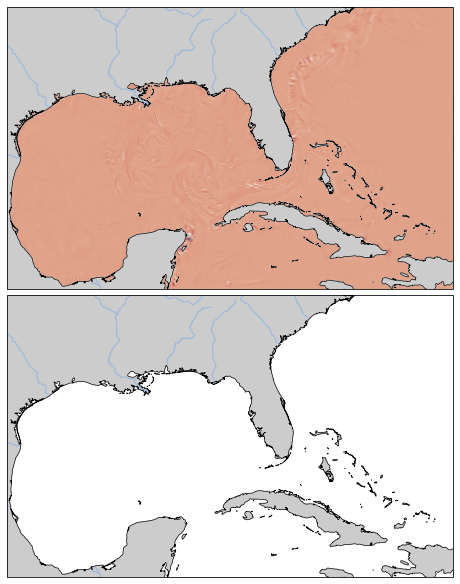

In [57]:
t = -1
ncols = 1;nrows = 2;
fig, ax = plt.subplots(nrows,ncols,figsize = (8,8), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True)
lat_rad = 1.0/np.cos(np.radians(latc_64.mean().values))
m = ax[0].scatter(lonc_64,latc_64,c=ds_128.divergence[-1,:,10].values,
                  cmap=plt.get_cmap('cmo.curl'),
                  # vmin=30,vmax=35.5, s= 1,
                  transform = ccrs.PlateCarree())

# m = ax[1].scatter(lonc_128,latc_128,c=ds_128.salinityAtBottom[t],
#                   cmap=plt.get_cmap('cmo.haline'),
#                   vmin=30,vmax=35.5, s= 1,
#                   transform = ccrs.PlateCarree())


for i in range(2):
    ax[i].set_extent([-98, -70, 18, 35], ccrs.PlateCarree())
    ax[i].add_feature(land_10m, facecolor='0.8')
    ax[i].set_aspect(lat_rad)
    ax[i].add_feature(cartopy.feature.RIVERS, linewidth=1)
    ax[i].coastlines(resolution='10m', linewidth = 0.65)  

In [ ]:
t = -1
ncols = 1;nrows = 3;
fig, ax = plt.subplots(nrows,ncols,figsize = (8,12), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True)
lat_rad = 1.0/np.cos(np.radians(latc_64.mean().values))
m = ax[0].scatter(lonc_64,latc_64,c=ds_64.relativeVorticityCell[t,:,0]/dsi_64.fCell,
                  cmap=plt.get_cmap('cmo.curl'),
                  vmin=-1,vmax=1, s= 1,
                  transform = ccrs.PlateCarree())

m1 = ax[1].scatter(lonc_64,latc_64,c=div_64[t],
                  cmap=plt.get_cmap('cmo.balance'),
                  vmin=-0.1,vmax=0.1, s= 1,
                  transform = ccrs.PlateCarree())

m2 = ax[2].scatter(lonc_64,latc_64,c=w_64[t]*1e4,
                  cmap=plt.get_cmap('cmo.delta'),
                  vmin=-1,vmax=1, s= 1,
                  transform = ccrs.PlateCarree())

for i in range(3):
    ax[i].set_extent([-98, -70, 18, 35], ccrs.PlateCarree())
    ax[i].add_feature(land_10m, facecolor='0.8')
    ax[i].set_aspect(lat_rad)
    ax[i].add_feature(cartopy.feature.RIVERS, linewidth=1)
    ax[i].coastlines(resolution='10m', linewidth = 0.65)  

fig.colorbar(m, ax = ax[0], label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')
fig.colorbar(m1, ax = ax[1], label = r'$(\partial_x u + \partial_y v) f^{-1}$', extend = 'both')
fig.colorbar(m2, ax = ax[2], label = r'$w$ [10$^{-4}$ ms$^{-1}$]', extend = 'both')

gl = ax[0].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = False

gl = ax[1].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = False

gl = ax[2].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

ax[0].set_title('Surface vorticity: '+str(ds_64.xtime[t].values)[4:-1])
ax[1].set_title('Surface divergence: '+str(ds_64.xtime[t].values)[4:-1])
ax[2].set_title('Surface vertical velocity: '+str(ds_64.xtime[t].values)[4:-1])

fig.canvas.draw()

plt.savefig('mpas_3km_rvortdivw_03_31_64lay.png', dpi = 300, bbox_inches='tight')

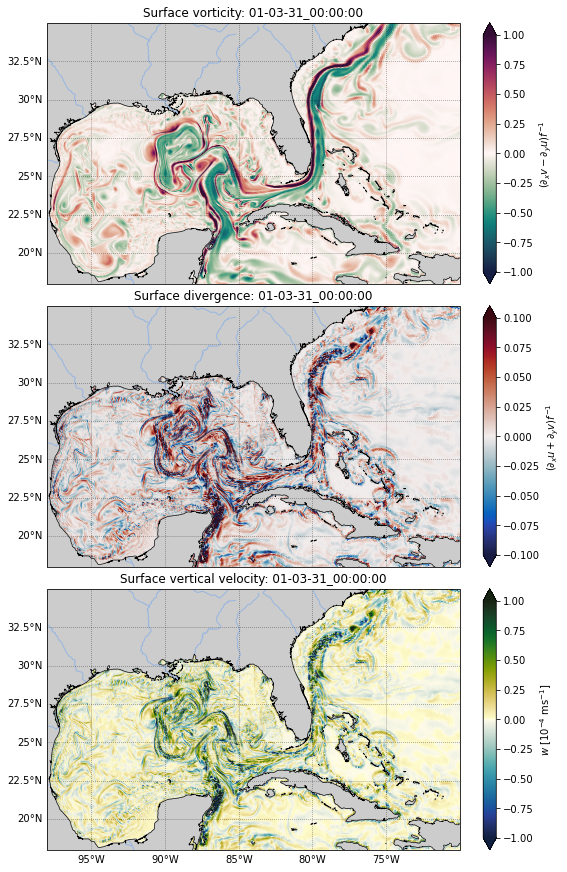

In [31]:
t = -1
ncols = 1;nrows = 3;
fig, ax = plt.subplots(nrows,ncols,figsize = (8,12), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True)
lat_rad = 1.0/np.cos(np.radians(latc_64.mean().values))
m = ax[0].scatter(lonc_64,latc_64,c=rv_64[t],
                  cmap=plt.get_cmap('cmo.curl'),
                  vmin=-1,vmax=1, s= 1,
                  transform = ccrs.PlateCarree())

m1 = ax[1].scatter(lonc_64,latc_64,c=div_64[t],
                  cmap=plt.get_cmap('cmo.balance'),
                  vmin=-0.1,vmax=0.1, s= 1,
                  transform = ccrs.PlateCarree())

m2 = ax[2].scatter(lonc_64,latc_64,c=w_64[t]*1e4,
                  cmap=plt.get_cmap('cmo.delta'),
                  vmin=-1,vmax=1, s= 1,
                  transform = ccrs.PlateCarree())

for i in range(3):
    ax[i].set_extent([-98, -70, 18, 35], ccrs.PlateCarree())
    ax[i].add_feature(land_10m, facecolor='0.8')
    ax[i].set_aspect(lat_rad)
    ax[i].add_feature(cartopy.feature.RIVERS, linewidth=1)
    ax[i].coastlines(resolution='10m', linewidth = 0.65)  

fig.colorbar(m, ax = ax[0], label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')
fig.colorbar(m1, ax = ax[1], label = r'$(\partial_x u + \partial_y v) f^{-1}$', extend = 'both')
fig.colorbar(m2, ax = ax[2], label = r'$w$ [10$^{-4}$ ms$^{-1}$]', extend = 'both')

gl = ax[0].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = False

gl = ax[1].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = False

gl = ax[2].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

ax[0].set_title('Surface vorticity: '+str(ds_64.xtime[t].values)[4:-1])
ax[1].set_title('Surface divergence: '+str(ds_64.xtime[t].values)[4:-1])
ax[2].set_title('Surface vertical velocity: '+str(ds_64.xtime[t].values)[4:-1])

fig.canvas.draw()

plt.savefig('mpas_3km_rvortdivw_03_31_64lay.png', dpi = 300, bbox_inches='tight')

### Repeat for 128 layer case 

In [35]:
w_64[-1].values

array([ 1.44126832e-06,  9.69949149e-07, -2.45603375e-06, ...,
       -6.87279721e-06, -4.53343742e-05, -1.51122114e-05])

In [37]:
w_128[-1].values

array([ 2.89055049e-08,  2.61785653e-08, -1.17539730e-07, ...,
        3.40730813e-06, -2.68451358e-06,  5.51020895e-08])

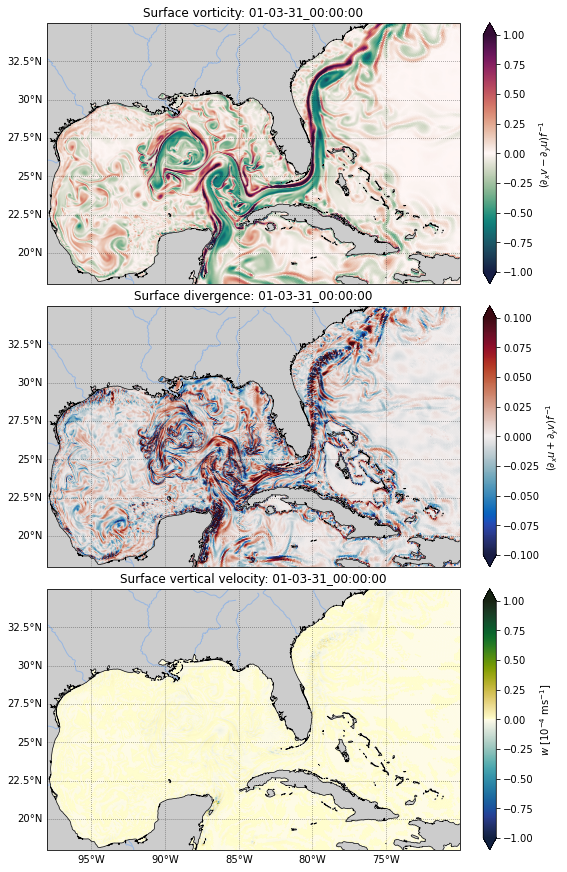

In [32]:
t = -1
ncols = 1;nrows = 3;
fig, ax = plt.subplots(nrows,ncols,figsize = (8,12), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True)
lat_rad = 1.0/np.cos(np.radians(latc_64.mean().values))
m = ax[0].scatter(lonc_128,latc_128,c=rv_128[t],
                  cmap=plt.get_cmap('cmo.curl'),
                  vmin=-1,vmax=1, s= 1,
                  transform = ccrs.PlateCarree())

m1 = ax[1].scatter(lonc_128,latc_128,c=div_128[t],
                  cmap=plt.get_cmap('cmo.balance'),
                  vmin=-0.1,vmax=0.1, s= 1,
                  transform = ccrs.PlateCarree())

m2 = ax[2].scatter(lonc_128,latc_128,c=w_128[t]*1e4,
                  cmap=plt.get_cmap('cmo.delta'),
                  vmin=-1,vmax=1, s= 1,
                  transform = ccrs.PlateCarree())

for i in range(3):
    ax[i].set_extent([-98, -70, 18, 35], ccrs.PlateCarree())
    ax[i].add_feature(land_10m, facecolor='0.8')
    ax[i].set_aspect(lat_rad)
    ax[i].add_feature(cartopy.feature.RIVERS, linewidth=1)
    ax[i].coastlines(resolution='10m', linewidth = 0.65)  

fig.colorbar(m, ax = ax[0], label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')
fig.colorbar(m1, ax = ax[1], label = r'$(\partial_x u + \partial_y v) f^{-1}$', extend = 'both')
fig.colorbar(m2, ax = ax[2], label = r'$w$ [10$^{-4}$ ms$^{-1}$]', extend = 'both')

gl = ax[0].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = False

gl = ax[1].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = False

gl = ax[2].gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

ax[0].set_title('Surface vorticity: '+str(ds_128.xtime[t].values)[4:-1])
ax[1].set_title('Surface divergence: '+str(ds_128.xtime[t].values)[4:-1])
ax[2].set_title('Surface vertical velocity: '+str(ds_128.xtime[t].values)[4:-1])

fig.canvas.draw()

plt.savefig('mpas_3km_rvortdivw_03_31_128lay.png', dpi = 300, bbox_inches='tight')